In [18]:
import astropy
import astropy.units as u
import numpy as np

In [2]:
import pandas as pd
import matplotlib  as mpl
from matplotlib import pylab as plt


In [63]:

# https://arxiv.org/pdf/1511.05580.pdf
# fig 2

model_1day_3Mpc_hotokezaka = pd.read_csv('kilonova_hotokezaka.csv', names = ["E_keV", "F_phscm2keV"], skiprows=1)

model_1day_3Mpc_hotokezaka['F_ergcm2s1keV'] = \
    (
        np.array(model_1day_3Mpc_hotokezaka.F_phscm2keV) / u.keV / u.cm**2 / u.s \
        * (np.array(model_1day_3Mpc_hotokezaka.E_keV) * u.keV)
    ).to(u.erg/u.cm**2/u.s/u.keV)

In [35]:

# https://iopscience.iop.org/article/10.3847/1538-4357/ab64d8/pdf
# fig 4

model_1day_3Mpc = pd.read_csv('~/Downloads/kilonova.csv', names = ["E_MeV", "F_MeVs1cm2"], skiprows=1)

model_1day_3Mpc['E_keV'] = (np.array(model_1day_3Mpc.E_MeV) * u.MeV).to(u.keV)
model_1day_3Mpc['F_ergcm2s1'] = (np.array(model_1day_3Mpc.F_MeVs1cm2) * u.MeV / u.cm**2 / u.s).to(u.erg/u.cm**2/u.s)
model_1day_3Mpc['F_ergcm2s1keV'] = model_1day_3Mpc['F_ergcm2s1'] / model_1day_3Mpc['E_keV']

In [58]:
import seaborn as sns


In [86]:
spi_ul = pd.read_csv('/home/savchenk/work/drafts/ligo/170817/data/plot_data/sensitivity_spi.csv')
spi_ul['sens_ergcm2s'] = spi_ul.sens * (spi_ul.emin * u.keV.to(u.erg)) * spi_ul.emin
spi_ul['sens_ergcm2skeV'] = spi_ul['sens_ergcm2s'] / spi_ul.emin

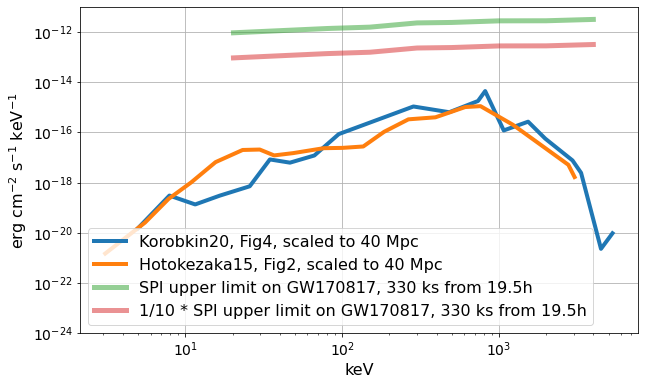

In [105]:
scale_to_Mpc = 40

plt.figure(figsize=(10, 6))
plt.plot(
    model_1day_3Mpc.E_keV,
    model_1day_3Mpc.F_ergcm2s1keV * (3/scale_to_Mpc)**2,
    label="Korobkin20, Fig4, scaled to 40 Mpc",
    lw=4
)

plt.plot(
    model_1day_3Mpc_hotokezaka.E_keV,
    model_1day_3Mpc_hotokezaka.F_ergcm2s1keV * (3/scale_to_Mpc)**2,
    label="Hotokezaka15, Fig2, scaled to 40 Mpc",
    lw=4
)

plt.plot(
    # https://iopscience.iop.org/article/10.3847/2041-8213/aa8f94
    spi_ul.emin,
    spi_ul['sens_ergcm2skeV'],
    lw=5,
    alpha=0.5,
    label="SPI upper limit on GW170817, 330 ks from 19.5h"
)

plt.plot(
    # https://iopscience.iop.org/article/10.3847/2041-8213/aa8f94
    spi_ul.emin,
    spi_ul['sens_ergcm2skeV']*1e-1,
    lw=5,
    alpha=0.5,
    label="1/10 * SPI upper limit on GW170817, 330 ks from 19.5h"
)

plt.legend(fontsize=16)

plt.loglog()

plt.xlabel('keV', fontsize=16)
plt.ylabel('erg cm$^{-2}$ s$^{-1}$ keV$^{-1}$', fontsize=16)

plt.grid()

plt.ylim([1e-24, 1e-11])

_=plt.yticks(fontsize=14)
_=plt.xticks(fontsize=14)